In [18]:
!mkdir data

In [ ]:
%cd data

/content/data


In [ ]:
!unzip -qq /content/drive/MyDrive/KDT/offline/project2/dataset.zip 

In [ ]:
!ls ./dataset/

'label(polygon)_train.json'   label_train.json	       test	   train
 label_test.json	      sample_submission.json   test.json


### label_test.json 수정

In [ ]:
import json

with open("/content/data/dataset/label_test.json") as f:
  data_train = json.load(f)

data_train['categories'] = [{'id': 1, 'name': 'Normal'}]

print(data_train.keys())

with open('/content/data/dataset/test.json', 'w') as f:
    json.dump(data_train, f)

dict_keys(['images', 'categories'])


### 이미지 시각화

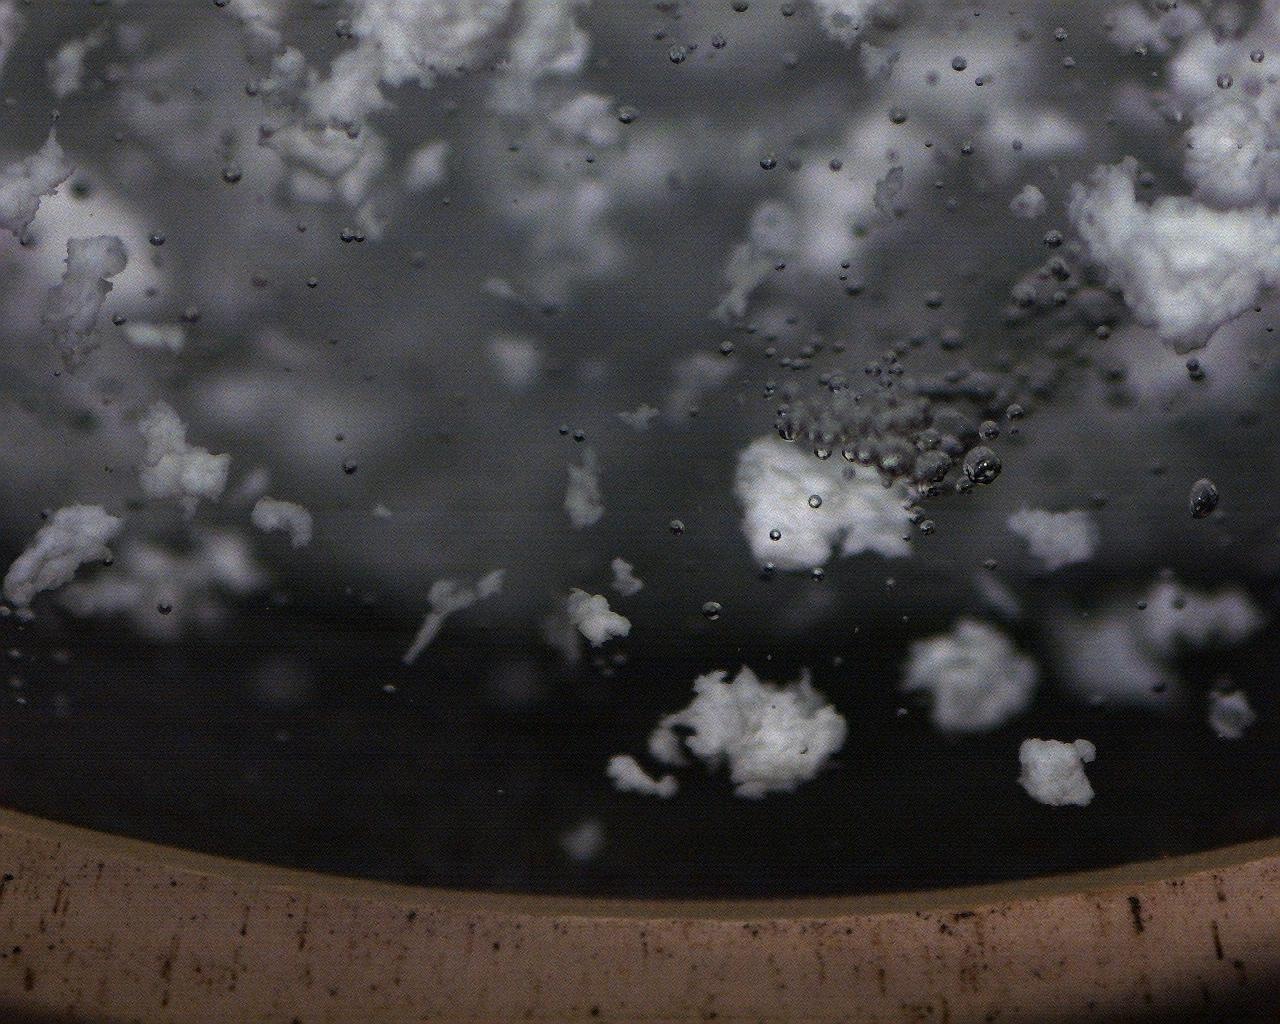

In [20]:
from glob import glob 
import cv2
from google.colab.patches import cv2_imshow


src = cv2.imread('/content/data/dataset/train/0002.jpg')
cv2_imshow(src)

In [25]:
src.shape

(1024, 1280, 3)

size : 1024 x 1280
 
channel : 3 (RGB)

### train set data 개수

In [21]:
!ls /content/data/dataset/train | wc

    520     520    4680


In [22]:
!ls /content/data/dataset/test | wc

    350     350    3150


총 520장의 train set, 350장의 test set이 있음.

### label(polygon)_train.json 살펴보기

In [24]:
import json
with open('/content/data/dataset/label(polygon)_train.json') as f:
  json_data = json.load(f)

json_data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [30]:
json_data['images'][:10]

[{'id': 1, 'width': 1280, 'height': 1024, 'file_name': '0398.jpg'},
 {'id': 2, 'width': 1280, 'height': 1024, 'file_name': '0985.jpg'},
 {'id': 3, 'width': 1280, 'height': 1024, 'file_name': '0538.jpg'},
 {'id': 6, 'width': 1280, 'height': 1024, 'file_name': '0342.jpg'},
 {'id': 7, 'width': 1280, 'height': 1024, 'file_name': '0197.jpg'},
 {'id': 8, 'width': 1280, 'height': 1024, 'file_name': '0464.jpg'},
 {'id': 9, 'width': 1280, 'height': 1024, 'file_name': '0379.jpg'},
 {'id': 12, 'width': 1280, 'height': 1024, 'file_name': '0948.jpg'},
 {'id': 13, 'width': 1280, 'height': 1024, 'file_name': '0644.jpg'},
 {'id': 14, 'width': 1280, 'height': 1024, 'file_name': '0844.jpg'}]

In [31]:
json_data['images'][510:]

[{'id': 983, 'width': 1280, 'height': 1024, 'file_name': '0104.jpg'},
 {'id': 984, 'width': 1280, 'height': 1024, 'file_name': '0284.jpg'},
 {'id': 987, 'width': 1280, 'height': 1024, 'file_name': '0406.jpg'},
 {'id': 990, 'width': 1280, 'height': 1024, 'file_name': '0838.jpg'},
 {'id': 991, 'width': 1280, 'height': 1024, 'file_name': '0469.jpg'},
 {'id': 992, 'width': 1280, 'height': 1024, 'file_name': '0144.jpg'},
 {'id': 993, 'width': 1280, 'height': 1024, 'file_name': '0894.jpg'},
 {'id': 995, 'width': 1280, 'height': 1024, 'file_name': '0834.jpg'},
 {'id': 998, 'width': 1280, 'height': 1024, 'file_name': '0945.jpg'},
 {'id': 999, 'width': 1280, 'height': 1024, 'file_name': '0885.jpg'}]

In [33]:
json_data['annotations'][0].keys()

dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

In [34]:
json_data['categories'][0]

{'id': 1, 'name': 'Normal'}

✔️ label(polygon)_train.json

- keys() : images, annotations, categories
- **images**: 520개
- **images**엔 file_name, height, id, width로 구성
- **annotations**: 32,148개
- **annotations**엔 area, bbox, category_id, id, image_id, iscrowd, segmentation
    - category_id는 모두 1.
    - id는 0부터 32,147(총 32,148개)로 annotation하나당의 의미.
    - image_id는 annotations수가 32,148이라 32,148개가 있지만 unique한 수를 보면 520종류가 들어있다.
    - iscrowd는 모두 0.
        
        cf1)"iscrowd": 0 if your segmentation based on polygon (object instance)
        
        cf2)"iscrowd": 1 if your segmentation based uncompressed RLE (crowd)

### label_test.json 살펴보기

In [36]:
import json
with open('/content/data/dataset/label_test.json') as f:
  json_data2 = json.load(f)

json_data2.keys()

dict_keys(['images'])

In [37]:
json_data2['images'][0].keys()

dict_keys(['id', 'width', 'height', 'file_name'])